# Author : Preetam  Patel

## Task 7 : Stock Market Prediction using Numerical and Textual Analysis
## GRIP @ The Sparks Foundation

In this task I tried to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.
&nbsp;


## Technical Stack  : Sikit Learn, Numpy Array, Pandas, Matplotlib, Keras, NLTK, Textblob, Xgboost

In [1]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 


[nltk_data] Downloading package stopwords to C:\Users\Preetam
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Preetam
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Step 1 : Importing the Numerical dataset and performing Exploratory Analysis

In [2]:
# Dataframe for exploratory analysis
df=pd.read_csv('csv\WIPRO.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


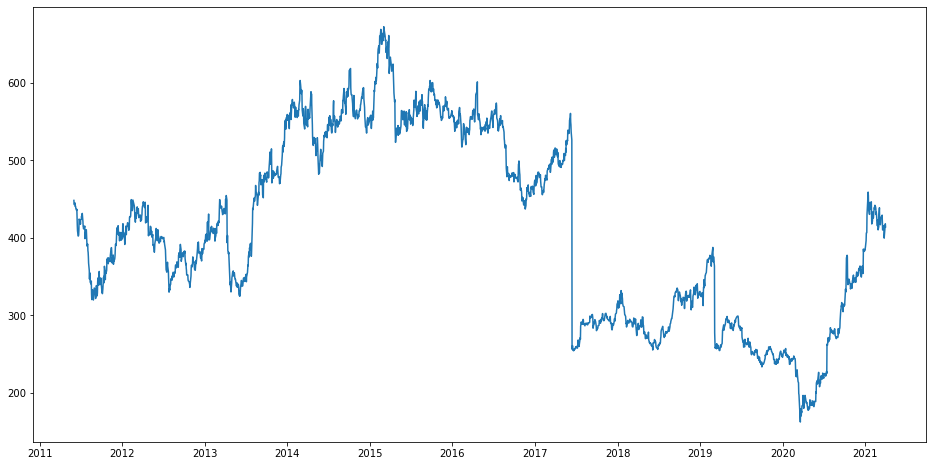

In [3]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

## Step 2 : Creating a dataframe for storing the Closing stock data per day

In [5]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [6]:
df2 = pd.read_csv('csv\WIPRO.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

## Step 3 : Data Normalization and Division into Training and Test sets

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [8]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## Step 4 : Creating a LSTM for Numerical Analysis

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
3538/3538 - 5s - loss: 4.2873e-04
Epoch 2/100
3538/3538 - 4s - loss: 1.5420e-04
Epoch 3/100
3538/3538 - 4s - loss: 1.4960e-04
Epoch 4/100
3538/3538 - 3s - loss: 1.4914e-04
Epoch 5/100
3538/3538 - 5s - loss: 1.3703e-04
Epoch 6/100
3538/3538 - 5s - loss: 1.2956e-04
Epoch 7/100
3538/3538 - 5s - loss: 1.2328e-04
Epoch 8/100
3538/3538 - 4s - loss: 1.2269e-04
Epoch 9/100
3538/3538 - 5s - loss: 1.1565e-04
Epoch 10/100
3538/3538 - 5s - loss: 1.1258e-04
Epoch 11/100
3538/3538 - 6s - loss: 1.0451e-04
Epoch 12/100
3538/3538 - 4s - loss: 9.9245e-05
Epoch 13/100
3538/3538 - 5s - loss: 9.1125e-05
Epoch 14/100
3538/3538 - 5s - loss: 8.5234e-05
Epoch 15/100
3538/3538 - 5s - loss: 8.2705e-05
Epoch 16/100
3538/3538 - 5s - loss: 8.3024e-05
Epoch 17/100
3538/3538 - 4s - loss: 7.9371e-05
Epoch 18/100
3538/3538 - 4s - loss: 7.1421e-05
Epoch 19/100
3538/3538 - 5s - loss: 7.6089e-05
Epoch 20/100
3538/3538 - 5s - loss: 7.8641e-05
Epoch 21/100
3538/3538 - 5s - loss: 7.4779e-05
Epoch 22/100
3538/3538

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

## Step 5 : Making Predictions

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")



# Step 6 : Creating a Hybrid model for Numerical and textual Analysis

In [ ]:
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('csv\india-news-headlines.csv', names = columns)
news

## Step 7 : Text preprocessing

In [ ]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

In [ ]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

In [ ]:
#Grouping the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news

In [ ]:
news['News']

## Step 8 : Adding subjectivity and polarity Scores

In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

## Step 9 : Visualizing the polarity and Subjectivity scores

In [ ]:
plt.figure(figsize = (10,6))
news['Polarity'].hist(color = 'red')

In [ ]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'green')

## Step 10 : Performing Sentiment Analysis over the news Headlines

In [ ]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]
news

## Step 11 : Merging the numerical and textual data

In [ ]:
merge = news
merge

In [ ]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

In [ ]:
X = new_df[0:249]
y =df['Close']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

In [ ]:
x_train[:10]

## Step 12 : Training a Random Forest Regressor and Adaboost Regressor for hybrid analysis

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

## Step 13 : Determining the accuracy scores for both the  Models

In [ ]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

I have used two models, i.e., Random Forest Regressor and Adaboost Regressor to carry out hybrid analysis. From the RMSE values we see that Random Forest Regressor gives a mode accurate output (3960 RMSE). However, both the models have very high RMSE values. The reason for high values is the unpredictible nature of the stock prices.

## Conclusion
### I was  able to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines. 
# Thank You